# ML Course 3 - Practice

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [3]:
data = pd.read_csv("FuelConsumption.csv")

In [4]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
200,2014,CHEVROLET,CRUZE,MID-SIZE,1.8,4,M6,X,9.5,6.5,8.2,34,189
381,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,5.0,8,AS6,X,16.4,12.3,14.6,19,336
525,2014,HYUNDAI,VELOSTER TURBO,COMPACT,1.6,4,M6,X,9.7,7.1,8.5,33,196
1035,2014,VOLKSWAGEN,JETTA,COMPACT,1.8,4,M5,X,9.4,6.7,8.2,34,189
10,2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225
198,2014,CHEVROLET,CRUZE,MID-SIZE,1.4,4,M6,X,9.1,6.3,7.8,36,179


1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
2. Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
3. Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
4. What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
5. Plot the regression line over the data.
6. Plot the distribution of the residuals (i.e. the error terms).
7. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$).
8. Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance?
9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?
* Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?  

__HINT__: as you will be performing the same operations multiple times on different data sets with different variables, you might want to wrap some pieces of code in functions in order to be able to reuse it easily in different places of your notebook!

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data.shape

(1067, 13)

In [7]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

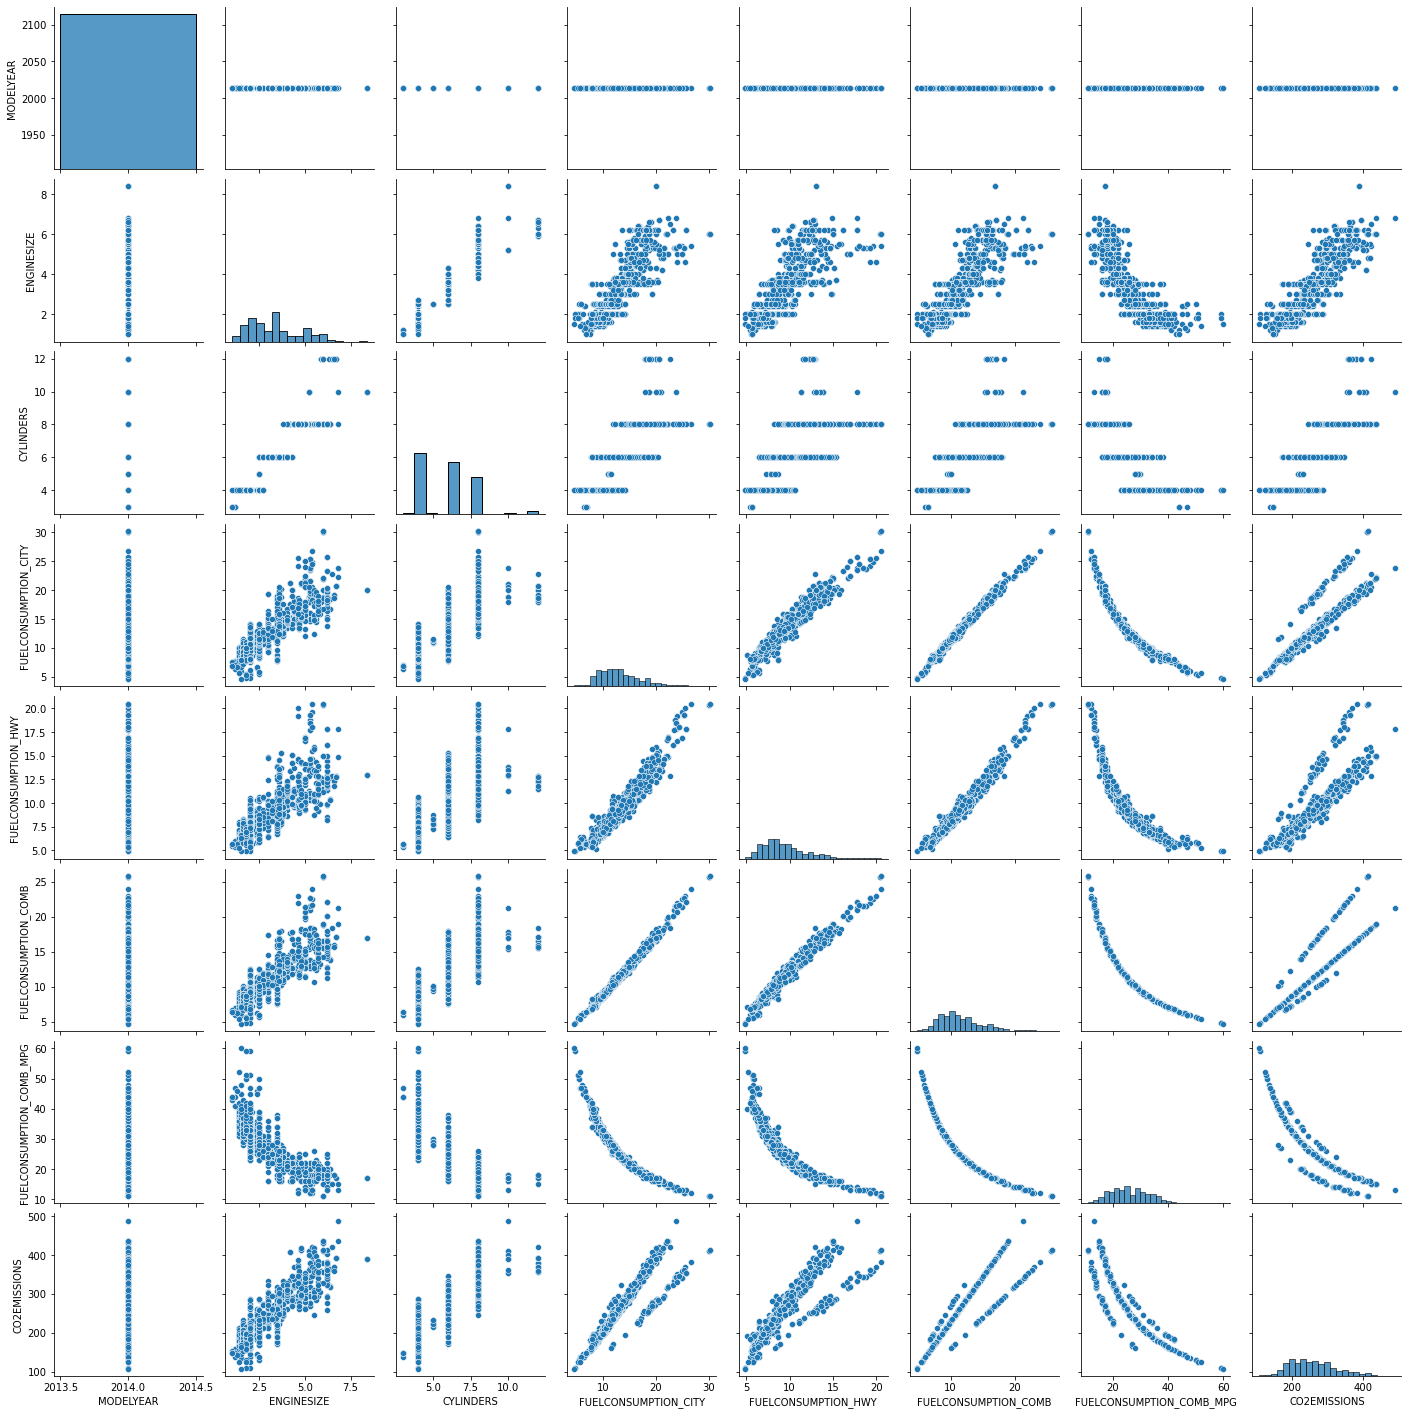

In [8]:
# Correlations all dataset
sns.pairplot(data)

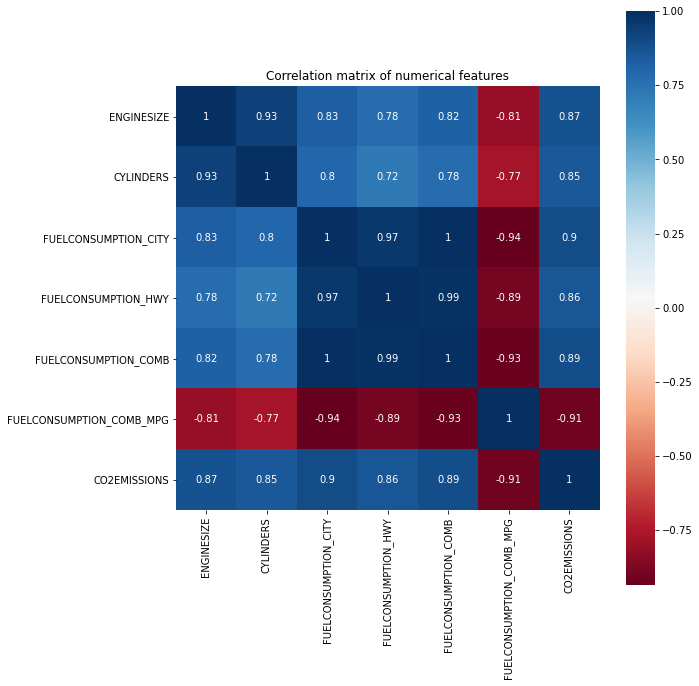

In [9]:
corr_data = data.iloc[:,4:]
corr=corr_data.corr()
plt.subplots(figsize=(10,10));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

In [10]:
# Compute the correlation value between the CO2 emission and the engine size
data[['CO2EMISSIONS', 'ENGINESIZE']].corr()

,CO2EMISSIONS,ENGINESIZE
CO2EMISSIONS,1.000000,0.874154
ENGINESIZE,0.874154,1.000000


# 2.Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?

Based on the Correlation matrix of numerical features,Between C02 emission and Engize size, they are highly correlated (the score is 0.87).
Moreover, Based on the Engine size x CO2 emissions chart as below, We can see that C02 emissions increase linearly with engine size.
So, a linear regression model would fit well here..

In [1]:
plt.figure(figsize=(10,6), dpi= 80)

plt.scatter(data['ENGIZESIZE'], data['CO2EMISSIONS'], c='green')
plt.xlabel("ENGINESIZE(L)")
plt.ylabel("CO2EMISSIONS()")
plt.title(" Engine size x CO2 emissions ")
plt.show()

NameError: name 'plt' is not defined

# 3.Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).

In [12]:
# check for missing data
data[['ENGINESIZE', 'CO2EMISSIONS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENGINESIZE    1067 non-null   float64
 1   CO2EMISSIONS  1067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


Modeling
In the code below, we are making a liner regression model using the training data:

In [21]:
X = data['ENGINESIZE'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)
print(y)

[[196]
 [221]
 [136]
 ...
 [271]
 [260]
 [294]]


In [22]:
# Generate training and testing data from our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# We are using 75% of our data for training and 25% for testing.

In [23]:
#Training the Algorithm
# And finally, to train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# 4.What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model?

Based on the equation: linear regression formula: (Y = A + B.X) 
We have A=regressor.intercept_ and B=regressor.coef_
If an engine size is increased by 1 L. It means that X in linear regression formula increases 1. So Y(the CO2 emission) will be increased by B(39.24838431).

In [24]:
regressor.intercept_

array([126.10080983])

In [25]:
# We can check the parameters of the model (estimations of beta_0 and beta_1):

#Intercept
regressor.coef_
#Slope

array([[39.40232724]])

# 5.Plot the regression line over the data.

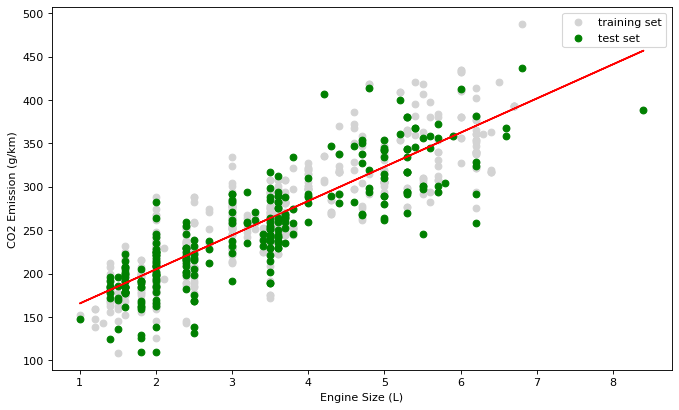

In [34]:
# Using training data to make regression line
# X_plot = np.arange(min(X), max(X), 0.1)
# y_plot = regressor.predict(X_plot.reshape(-1, 1))

#--------------------------------------
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='green', label='test set')
plt.plot(X_train, regressor.coef_[0][0]*X_train + regressor.intercept_[0], 'red')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emission (g/km)")
plt.legend()
plt.show()

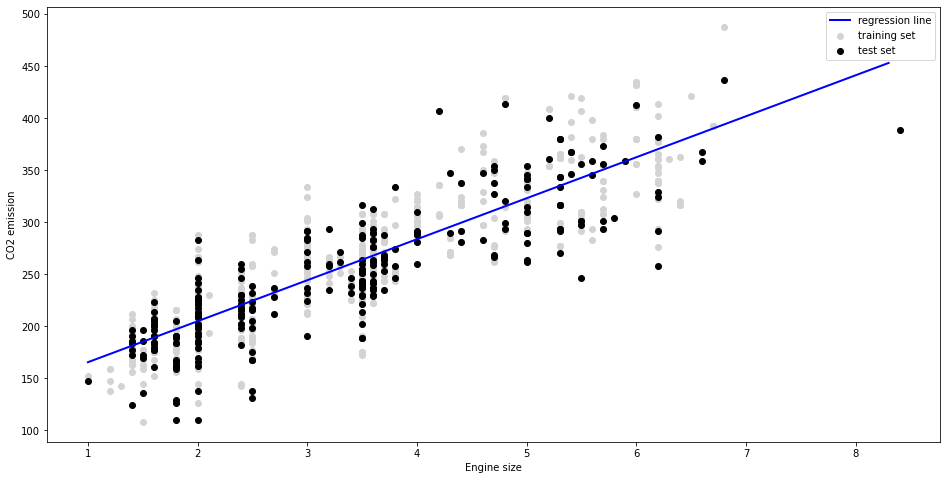

In [37]:
# method 2
X_plot = np.arange(min(X_train), max(X_train), 0.1)

y_plot = regressor.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

# 6.Plot the distribution of the residuals (i.e. the error terms)

Text(0.5, 1.0, 'the distribution of the residuals')

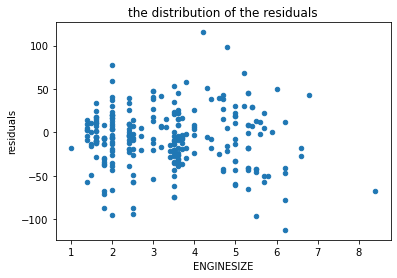

In [90]:
y_pred = regressor.predict(X_test)
errors = (y_pred - y_test) # also known as residuals
error_plot = X_test.copy()
error_plot['residuals'] = errors
error_plot.plot.scatter(x='ENGINESIZE', y='residuals')
plt.title('the distribution of the residuals')

# 7.Evaluate the performance of the model (MSE, RMSE, MAE,  𝑅2 ).

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score

def Performance_metrics(y_pred,y_test):
    errors=(y_pred - y_test)
    rss = sum(errors ** 2)
    mae = np.mean(abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    print(f"Residual sum of squares (RSS): {rss :.2f}")
    print("-"*50)
    print(f"Mean square error (MSE): {mse :.2f}")
    print(f"Root mean square error (RMSE): {rmse :.2f}")
    print(f"Mean absolute error (MAE): {mae :.2f}")
    print("Variance-score (coefficient of determination): R² = %.2f" % r2_score(y_test , y_pred))
    
# -------------------------------------

In [45]:
y_pred1= regressor.predict(X_test)
Performance_metrics(y_pred1, y_test)

Residual sum of squares (RSS): 304376.85
--------------------------------------------------
Mean square error (MSE): 1139.99
Root mean square error (RMSE): 33.76
Mean absolute error (MAE): 25.60
Variance-score (coefficient of determination): R² = 0.72


# 8.Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance?

In [46]:
# the intercept and the coefficient would be both 0
regressor1 = LinearRegression(fit_intercept=False)
regressor1.fit(X_train, y_train)
regressor1.coef_[0] = 0

y_pred2 = regressor1.predict(X_test) #y_pred2=0
Performance_metrics(y_pred2,y_test)

Residual sum of squares (RSS): 17731169.00
--------------------------------------------------
Mean square error (MSE): 66408.87
Root mean square error (RMSE): 257.70
Mean absolute error (MAE): 249.67
Variance-score (coefficient of determination): R² = -15.29


# Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?

In [47]:
# check for missing data
data[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FUELCONSUMPTION_COMB  1067 non-null   float64
 1   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


In [48]:
X1 = data[['FUELCONSUMPTION_COMB']]
y1= data['CO2EMISSIONS']
X1.shape, y1.shape

((1067, 1), (1067,))

In [49]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state = 0)

In [50]:
from sklearn.linear_model import LinearRegression

regressor2 = LinearRegression()
regressor2.fit(X1_train, y1_train)

LinearRegression()

In [51]:
regressor2.intercept_

70.55169326036074

In [52]:
regressor2.coef_

array([16.0943261])

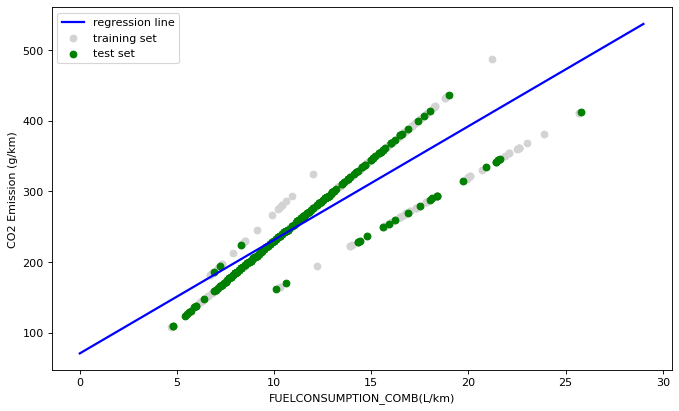

In [53]:
X1_plot = np.arange(0,30,1).reshape(-1, 1)
y1_plot = regressor2.predict(X1_plot)
#--------------------------------------
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X1_train, y1_train, c='lightgray', label='training set')
plt.scatter(X1_test, y1_test, c='green', label='test set')
plt.plot(X1_plot, y1_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("FUELCONSUMPTION_COMB(L/km)")
plt.ylabel("CO2 Emission (g/km)")
plt.legend()
plt.show()

In [54]:
y_pred2= regressor2.predict(X1_test)
Performance_metrics(y_pred2, y1_test)

Residual sum of squares (RSS): 211510.60
--------------------------------------------------
Mean square error (MSE): 792.17
Root mean square error (RMSE): 28.15
Mean absolute error (MAE): 20.22
Variance-score (coefficient of determination): R² = 0.81


Conclude: The metrics RSS,MSE,RMSE,MAE of the model between C02 emission and FUELCONSUMPTION_COMB is less than the metric of the model between C02 emission and engize size. R² (C02 & FUELCONSUMPTION_COMB) is greater than R² (C02 & Engize size).

We can conclude that the regression model between C02 emission and FUELCONSUMPTION_COMB fits worse than the regression model between C02 emission and Engize size

# Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?

In [55]:
dummy=data['CO2EMISSIONS']
dummy

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [82]:
mean=dummy.mean()
mean

256.2286785379569

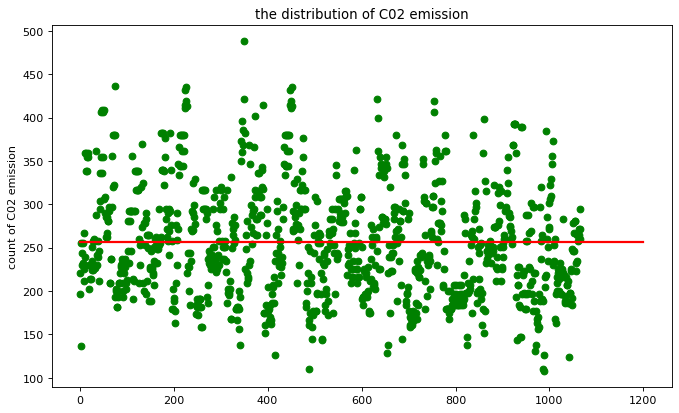

In [106]:
X1_plot =np.linspace(0,1200,1000)
y1_plot = mean +0*X1_plot

plt.figure(figsize=(10,6), dpi= 80)
plt.plot(data['CO2EMISSIONS'],'ro', color='green')
plt.plot(X1_plot, y1_plot, '-r', label='regression line', linewidth=2)
plt.ylabel('count of C02 emission')
plt.title('the distribution of C02 emission')
plt.show()


In [103]:
    y_test_dummy=data['CO2EMISSIONS']
    y_pred_dummy=0
    errors=(y_pred_dummy - y_test_dummy)
    rss = sum(errors ** 2)
    mae = np.mean(abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    print(f"Residual sum of squares (RSS): {rss :.2f}")
    print("-"*50)
    print(f"Mean square error (MSE): {mse :.2f}")
    print(f"Root mean square error (RMSE): {rmse :.2f}")
    print(f"Mean absolute error (MAE): {mae :.2f}")
#     print("Variance-score (coefficient of determination): R² = %.2f" % r2_score(y_test_dummy , y_pred_dummy))
    

Residual sum of squares (RSS): 74333004.00
--------------------------------------------------
Mean square error (MSE): 69665.42
Root mean square error (RMSE): 263.94
Mean absolute error (MAE): 256.23


Thí predictive model doesn't fit for prediction because the performances (RSS,MSE,RMSE,MAE) are very high compared to the linear regression model.